In [1]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [2]:
qc = QuantumCircuit(3)

In [3]:
qc.h(2)
qc.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ H ├
     └───┘

In [4]:
import numpy as np
from numpy import pi

In [5]:
 qc.cp(pi/2, 1, 2)
qc.draw()

q_0: ──────────────
                   
q_1: ──────■───────
     ┌───┐ │P(π/2) 
q_2: ┤ H ├─■───────
     └───┘

In [6]:
qc.cp(pi/4, 0, 2) 
qc.draw()

q_0: ───────────────■───────
                    │       
q_1: ──────■────────┼───────
     ┌───┐ │P(π/2)  │P(π/4) 
q_2: ┤ H ├─■────────■───────
     └───┘

In [7]:
qc.h(1)
qc.cp(pi/2, 0, 1) 
qc.h(0)
qc.draw()

┌───┐
q_0: ───────────────■─────────────■───────┤ H ├
                    │       ┌───┐ │P(π/2) └───┘
q_1: ──────■────────┼───────┤ H ├─■────────────
     ┌───┐ │P(π/2)  │P(π/4) └───┘              
q_2: ┤ H ├─■────────■──────────────────────────
     └───┘

In [8]:
qc.swap(0,2)
qc.draw()

┌───┐   
q_0: ───────────────■─────────────■───────┤ H ├─X─
                    │       ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────■────────┼───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘

In [9]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

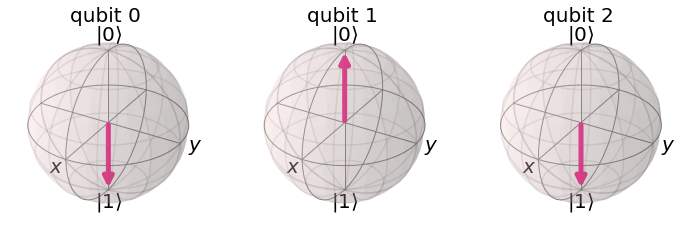

In [10]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

# explanation:-HERE WE CAN OBSERVE THE INITIAL STATE OF QUIBITS IN BLOCH SPHERE.
              # WE WILL OBSERVE THEM AGAIN AFTER APPLYING QUANTUM FOURIER TRANSFORM.
               


In [11]:
qc.h(2)
qc.cp(pi/2, 1, 2)
qc.cp(pi/4, 0, 2) 
qc.h(1)
qc.cp(pi/2, 0, 1) 
qc.h(0)
qc.swap(0,2)
qc.draw()


┌───┐                                     ┌───┐   
q_0: ┤ X ├───────────────■─────────────■───────┤ H ├─X─
     └───┘               │       ┌───┐ │P(π/2) └───┘ │ 
q_1: ───────────■────────┼───────┤ H ├─■─────────────┼─
     ┌───┐┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘

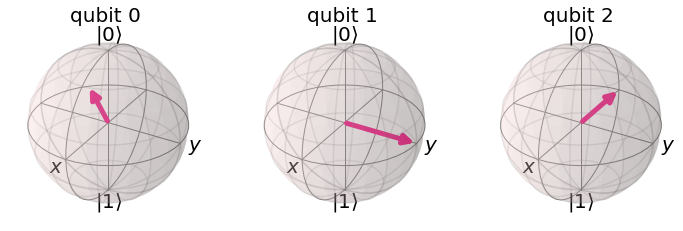

In [12]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

# WE CAN OBSERVE ZERO QUIBIT IS TURNED BY 5/8 FULL TURNS.
# WE CAN OBSERVE ZERO QUIBIT IS TURNED BY 10/8 FULL TURNS.
# WE CAN OBSERVE ZERO QUIBIT IS TURNED BY 20/8 FULL TURNS.

In [13]:
# WE WILL NOW APPLY INVERSE FOURIER TRANSFORM TO THESE QUIBIT STATES AN OBSERVE THAT IF WE GET THE INITIAL STATE OR NOT..

qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) 
qc.h(1)
qc.cp(-pi/4, 0, 2) 
qc.cp(-pi/2, 1, 2)
qc.h(2)
qc.draw()



┌───┐                                     ┌───┐    ░    ┌───┐          »
q_0: ┤ X ├───────────────■─────────────■───────┤ H ├─X──░──X─┤ H ├─■────────»
     └───┘               │       ┌───┐ │P(π/2) └───┘ │  ░  │ └───┘ │P(-π/2) »
q_1: ───────────■────────┼───────┤ H ├─■─────────────┼──░──┼───────■────────»
     ┌───┐┌───┐ │P(π/2)  │P(π/4) └───┘               │  ░  │                »
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X──░──X────────────────»
     └───┘└───┘                                         ░                   »
«                                   
«q_0: ──────■───────────────────────
«     ┌───┐ │                       
«q_1: ┤ H ├─┼─────────■─────────────
«     └───┘ │P(-π/4)  │P(-π/2) ┌───┐
«q_2: ──────■─────────■────────┤ H ├
«                              └───┘

In [14]:
qc.measure_all()
qc.draw()

┌───┐                                     ┌───┐    ░    ┌───┐          »
   q_0: ┤ X ├───────────────■─────────────■───────┤ H ├─X──░──X─┤ H ├─■────────»
        └───┘               │       ┌───┐ │P(π/2) └───┘ │  ░  │ └───┘ │P(-π/2) »
   q_1: ───────────■────────┼───────┤ H ├─■─────────────┼──░──┼───────■────────»
        ┌───┐┌───┐ │P(π/2)  │P(π/4) └───┘               │  ░  │                »
   q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X──░──X────────────────»
        └───┘└───┘                                         ░                   »
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                       ░ ┌─┐      
«   q_0: ──────■────────────────────────░─┤M├──────
«        ┌───┐ │                        ░ └╥┘┌─┐   
«   q_1: ┤ H ├─┼─────────■──────────────░──╫─┤M├───
«        └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ──────■─────────■────────┤ H ├─░──╫──╫─┤M├
«                                 └───┘ ░  ║  ║ └╥┘
«meas: 3/══════════════════════════════════╩══╩══╩═
«                                          0  1  2

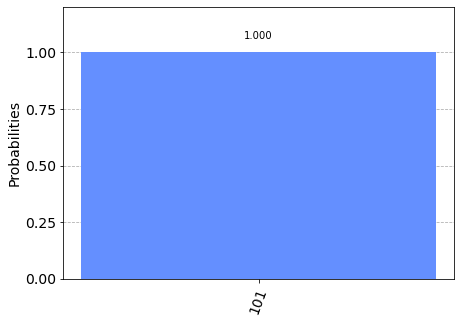

In [15]:
backend = Aer.get_backend('qasm_simulator') 
results = execute(qc, backend, shots = 1024).result()
count =results.get_counts()
plot_histogram(count)

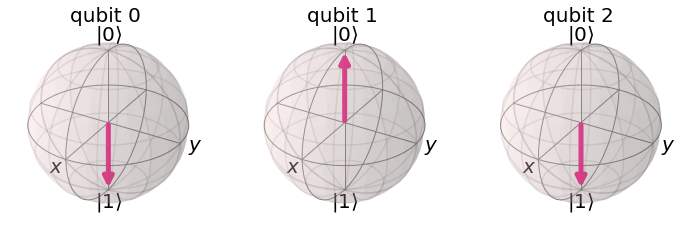

In [23]:
qc_init = qc.copy()
qc_init.save_statevector(label = 'sv2')
statevector = sim.run(qc_init).result().data()['sv2']
#statevector = statevectorobj.get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
#WE CAN OBSERVE THAT WE HAVE AGAIN GOT OUR INITIAL STATE.